<a href="https://colab.research.google.com/github/lingliao/cfdna-wgs/blob/master/TF_relative_coverage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("tidyverse")
install.packages("zoo")
install.packages("dplyr")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘conflicted’, ‘jsonlite’, ‘ragg’, ‘stringr’


Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [183]:
library(tidyverse)
library(zoo)
library(dplyr)

In [184]:
unzip("/content/health.zip")
unzip("/content/mpnst.zip")

In [185]:
import = function(path){
  counts = read.table(path, sep = " ")
  colnames(counts) = c("position", "count")
  counts = as_tibble(counts)
  return(counts)
}




In [186]:
names = list.files("/content/health", pattern = "*ZNF157*")
files = list.files("/content/health", pattern = "*ZNF157*", full.names = T)
names(files) = names
hox = lapply(files, import)
hox_all = hox %>% bind_rows(.id = "list_name")
hox_all = hox_all %>% mutate(pos = position -3000) %>% mutate(library = substr(list_name, 1, 6))
hox_all <- hox_all[hox_all$count >= 0.001, ]
hox_all = hox_all %>%
  group_by(library) %>%
  mutate(relative_coverage = count / max(count))


In [187]:
head(hox_all)

list_name,position,count,pos,library,relative_coverage
<chr>,<int>,<int>,<dbl>,<chr>,<dbl>
lib177_ZNF157_counts.tsv,5982,25,2982,lib177,0.2747253
lib177_ZNF157_counts.tsv,5975,25,2975,lib177,0.2747253
lib177_ZNF157_counts.tsv,5968,24,2968,lib177,0.2637363
lib177_ZNF157_counts.tsv,5896,24,2896,lib177,0.2637363
lib177_ZNF157_counts.tsv,5889,28,2889,lib177,0.3076923
lib177_ZNF157_counts.tsv,5990,29,2990,lib177,0.3186813


In [188]:
#hox_all = hox_all %>% mutate(relative_coverage = count/max(count))

In [189]:
names_p = list.files("/content/mpnst", pattern = "*ZNF157*")
files_p = list.files("/content/mpnst", pattern = "*ZNF157*", full.names = T)
names(files_p) = names_p

hox_p = lapply(files_p, import)
hox_all_p = hox_p %>% bind_rows(.id = "list_name")
hox_all_p = hox_all_p %>% mutate(pos = position -3000) %>% mutate(library = substr(list_name, 1, 6))
hox_all_p <- hox_all_p[hox_all_p$count >= 0.001, ]
hox_all_p = hox_all_p %>%
  group_by(library) %>%
  mutate(relative_coverage = count / max(count))

In [190]:
head(hox_all_p)

list_name,position,count,pos,library,relative_coverage
<chr>,<int>,<int>,<dbl>,<chr>,<dbl>
lib107_ZNF157_counts.tsv,5982,17,2982,lib107,0.3863636
lib107_ZNF157_counts.tsv,5975,16,2975,lib107,0.3636364
lib107_ZNF157_counts.tsv,5968,17,2968,lib107,0.3863636
lib107_ZNF157_counts.tsv,5896,12,2896,lib107,0.2727273
lib107_ZNF157_counts.tsv,5889,12,2889,lib107,0.2727273
lib107_ZNF157_counts.tsv,5990,15,2990,lib107,0.3409091


In [191]:
head(hox_all)

list_name,position,count,pos,library,relative_coverage
<chr>,<int>,<int>,<dbl>,<chr>,<dbl>
lib177_ZNF157_counts.tsv,5982,25,2982,lib177,0.2747253
lib177_ZNF157_counts.tsv,5975,25,2975,lib177,0.2747253
lib177_ZNF157_counts.tsv,5968,24,2968,lib177,0.2637363
lib177_ZNF157_counts.tsv,5896,24,2896,lib177,0.2637363
lib177_ZNF157_counts.tsv,5889,28,2889,lib177,0.3076923
lib177_ZNF157_counts.tsv,5990,29,2990,lib177,0.3186813


In [192]:
health <- hox_all[order(hox_all$pos,decreasing=FALSE),]
patient <- hox_all_p[order(hox_all_p$pos,decreasing=FALSE),]

In [193]:
head(health)

list_name,position,count,pos,library,relative_coverage
<chr>,<int>,<int>,<dbl>,<chr>,<dbl>
lib177_ZNF157_counts.tsv,1,24,-2999,lib177,0.2637363
lib474_ZNF157_counts.tsv,1,19,-2999,lib474,0.2714286
lib475_ZNF157_counts.tsv,1,26,-2999,lib475,0.3291139
lib476_ZNF157_counts.tsv,1,15,-2999,lib476,0.1807229
lib477_ZNF157_counts.tsv,1,20,-2999,lib477,0.2439024
lib478_ZNF157_counts.tsv,1,38,-2999,lib478,0.4691358


In [194]:
head(patient)

list_name,position,count,pos,library,relative_coverage
<chr>,<int>,<int>,<dbl>,<chr>,<dbl>
lib107_ZNF157_counts.tsv,1,26,-2999,lib107,0.5909091
lib109_ZNF157_counts.tsv,1,19,-2999,lib109,0.5277778
lib110_ZNF157_counts.tsv,1,21,-2999,lib110,0.5250000
lib113_ZNF157_counts.tsv,1,21,-2999,lib113,0.5526316
lib117_ZNF157_counts.tsv,1,19,-2999,lib117,0.5000000
lib250_ZNF157_counts.tsv,1,23,-2999,lib250,0.4181818


In [195]:
health__ <- data.frame(x = health$pos, y = health$relative_coverage, group = "Healthy")
patient__ <- data.frame(x = patient$pos, y = patient$relative_coverage, group = "MPNST")
coverage_ <- rbind(health__,patient__)

In [196]:
dim(coverage_)

[1] 270000      3

In [197]:
head(coverage_)

,x,y,group
,<dbl>,<dbl>,<chr>
1,-2999,0.2637363,Healthy
2,-2999,0.2714286,Healthy
3,-2999,0.3291139,Healthy
4,-2999,0.1807229,Healthy
5,-2999,0.2439024,Healthy
6,-2999,0.4691358,Healthy


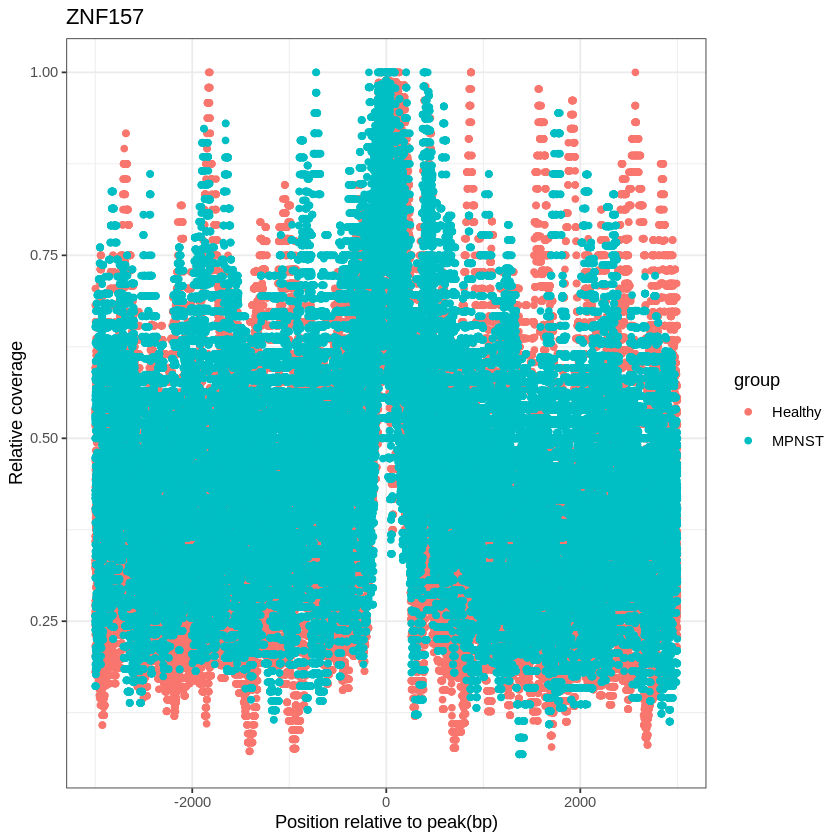

In [198]:
#mean_df <- aggregate(y ~ x + group, data = coverage_, mean)

# Create the plot with group means
ggplot(coverage_, aes(x, y, color = group)) +
  geom_point() +
  #xlim(-500, 500)+
  #ylim(0,1.0)+
  labs( title = "ZNF157", x = "Position relative to peak(bp)", y = "Relative coverage")+
  theme_bw()

In [199]:
#coverage_ <- coverage_[coverage_$y >= 0.1, ]

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 109978 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 114977 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 109978 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 114977 rows containing non-finite values (`stat_smooth()`).”


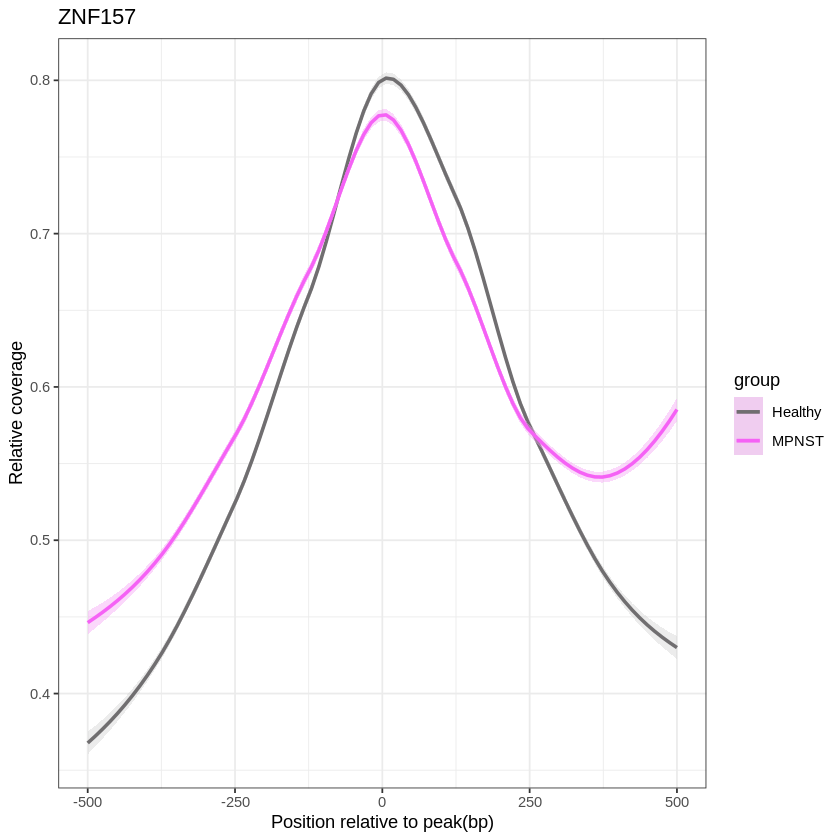

In [200]:
# Plot the data with smoothed lines of different colors
p <- ggplot(coverage_, aes(x = x, y = y, color = group)) +
  xlim(-500, 500)+
  #ylim(0,1.0)+
  #geom_point() +
  geom_smooth(data = subset(coverage_, group == "Healthy"), method = "loess", se = TRUE, fill = "#d1cfd1") +
  geom_smooth(data = subset(coverage_, group == "MPNST"), method = "loess", se = TRUE, fill = "#f59ff5") +
  scale_color_manual(values = c("#706e70", "#f562f5")) +
  labs( title = "ZNF157", x = "Position relative to peak(bp)", y = "Relative coverage")+
  
  theme_bw()

ggsave(file="ZNF157.pdf", width=6, height=3, dpi=500)
p